In [16]:
import pandas as pd


df = pd.read_csv("data/student-mat.csv", sep=";")
print(df.head()) # so we have  [5 rows x 33 columns]

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [22]:
print(df.isnull().sum())

print(df.dtypes)

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
school_MS            0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other       0
schoolsup_yes        0
famsup_yes           0
paid_yes             0
activities_yes       0
nursery_yes          0
higher_yes           0
internet_yes         0
romantic_yes         0
avg_grade            0
dtype: int6

In [18]:
df = df.dropna()

so the data type in int and theres no null values in our dataset 


In [23]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())

        age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0  1.023046     4     4           2          2         0       4         3   
1  0.238380     1     1           1          2         0       5         3   
2 -1.330954     1     1           1          2         3       4         3   
3 -1.330954     4     2           1          3         0       3         2   
4 -0.546287     3     3           1          2         0       4         3   

   goout  Dalc  ...  guardian_other  schoolsup_yes  famsup_yes  paid_yes  \
0      4     1  ...           False           True       False     False   
1      3     1  ...           False          False        True     False   
2      2     2  ...           False           True       False      True   
3      2     1  ...           False          False        True      True   
4      2     1  ...           False          False        True      True   

   activities_yes  nursery_yes  higher_yes  internet_yes  romantic_yes  \


In [20]:
# !pip install scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'absences', 'G1', 'G2']
df[num_cols] = scaler.fit_transform(df[num_cols])



###  Feature Scaling with StandardScaler

We standardize numerical features (`age`, `absences`, `G1`, `G2`) using `StandardScaler` from scikit-learn.  
This scales the data to have a mean of 0 and standard deviation of 1 — useful for improving model performance.

\[
x_{scaled} = \frac{x - \mu}{\sigma}
\]


In [ ]:
df['avg_grade'] = (df['G1'] + df['G2']) / 2

print(df.head())


okay this a new feature with the average of G1,G2 to be compared to the predicted G3

In [ ]:
X = df.drop('G3', axis=1)
y = df['G3']

splitting the data to input and output

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

splitting into data training set and testing set 

In [24]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


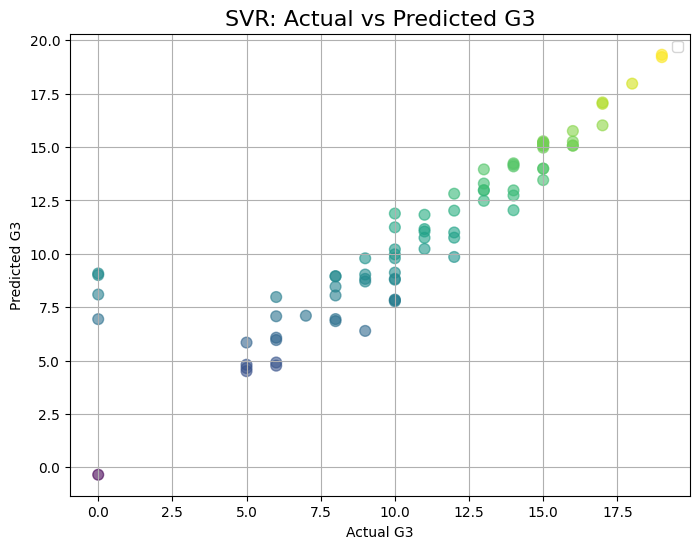

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, s=60, c=y_pred, cmap='viridis')


plt.title("SVR: Actual vs Predicted G3", fontsize=16)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.grid(True)
plt.show()